<a href="https://colab.research.google.com/github/andrecamara2004/andrecamara2004.github.io/blob/main/Supervised%20Learning/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) and Feature Engineering
This notebook demonstrates EDA and feature engineering with the Titanic dataset (classification task) and the Store Sales dataset (regression task).

## Part 1: Titanic Dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
path = "https://raw.githubusercontent.com/samsung-ai-course/6-7-edition/main/Supervised%20Learning/Datasets/titanic.csv" #or whatever other path you might have the file on titanic.csv
titanic = pd.read_csv(path)

# Preview dataset
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [2]:
# Basic information about the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [3]:
# Check for missing values
titanic.isnull().sum()

,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
Siblings/Spouses Aboard,0
Parents/Children Aboard,0
Fare,0


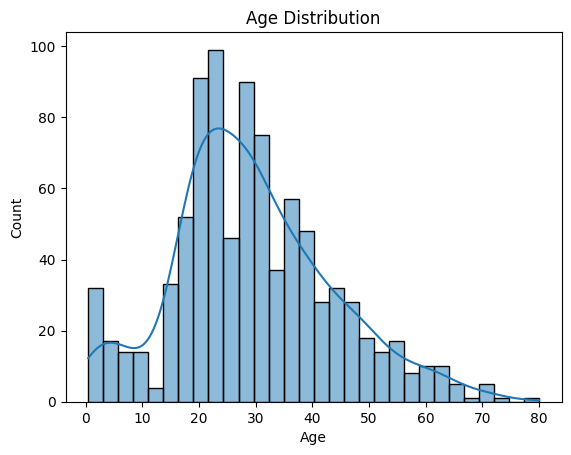

In [4]:
# Distribution of Age
sns.histplot(titanic['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

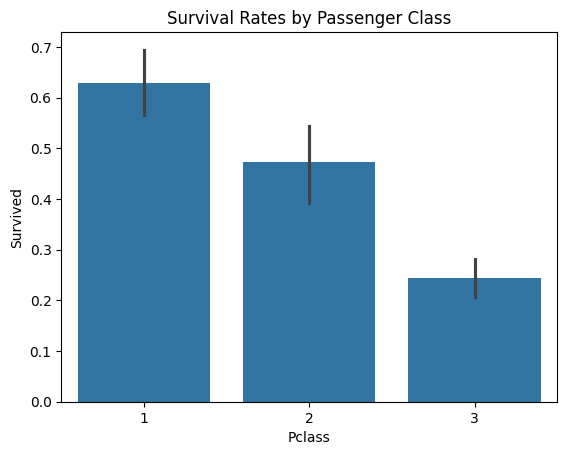

In [5]:
# Survival rates by Pclass
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title('Survival Rates by Passenger Class')
plt.show()

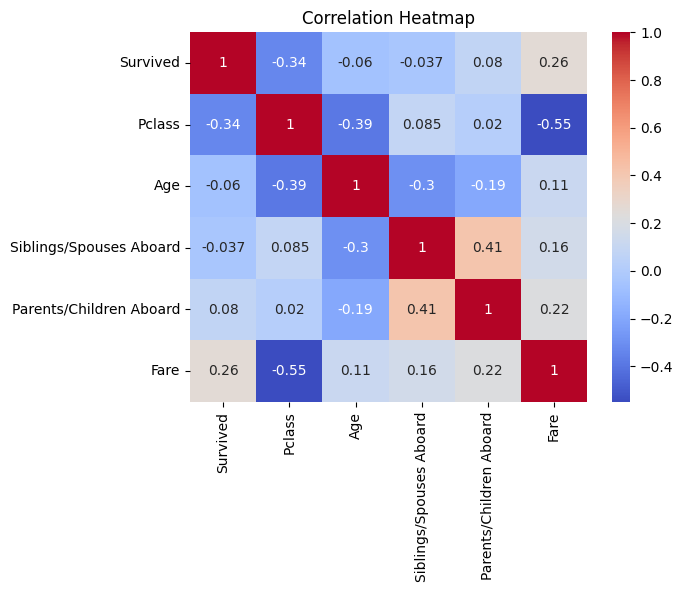

In [6]:
numerical_features = titanic.select_dtypes(include=['number']) #What is this doing?

sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Discussion
What conclusions can you take?

Which column/columns seems to be the most relevant to the target?

Which columns are extremely correlated ?

In [7]:
# Baseline experiment
# Predict everyone as non-survivors
baseline_prediction = np.zeros(len(titanic))
accuracy = (baseline_prediction == titanic['Survived']).mean()
print(f"Baseline Accuracy (predicting non-survivors): {accuracy:.2f}")

#What conclusion do you take from here ?

Baseline Accuracy (predicting non-survivors): 0.61


## Part 2: Feature Engineering with Titanic Dataset

In [8]:
# Categorical Encoding: One-hot encode 'Sex' and 'Pclass'
titanic_encoded = pd.get_dummies(titanic, columns=['Sex', 'Pclass'], drop_first=True)

# Handle missing values: Impute Age with median
titanic_encoded['Age'] = titanic_encoded['Age'].fillna(titanic_encoded['Age'].median())

# Feature Scaling: Normalize 'Fare'
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
titanic_encoded['Fare'] = scaler.fit_transform(titanic_encoded[['Fare']])
#TODO: What if we didnt normalize it ? How different would the results be ?

# Creating new features: FamilySize
titanic_encoded['FamilySize'] = titanic_encoded['Siblings/Spouses Aboard'] + titanic_encoded['Parents/Children Aboard'] + 1

# Preview the engineered dataset
titanic_encoded.head()

,Survived,Name,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male,Pclass_2,Pclass_3,FamilySize
0,0,Mr. Owen Harris Braund,22.0,1,0,0.014151,True,False,True,2
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,38.0,1,0,0.139136,False,False,False,2
2,1,Miss. Laina Heikkinen,26.0,0,0,0.015469,False,False,True,1
3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0,1,0,0.103644,False,False,False,2
4,0,Mr. William Henry Allen,35.0,0,0,0.015713,True,False,True,1


## Part 3
Select the appropriate features and train a logistic regression, train a KNN, train a Naive Bayes and SVM.

Which one has a better accuracy ?

P.s check the documentation of each of those algorithms


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define features (X) and target (y)
X = titanic_encoded[['Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare', 'Sex_male', 'Pclass_2', 'Pclass_3', 'FamilySize']]
y = titanic_encoded['Survived']

# Split data into training and testing sets (we will come back to this later)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize and train a logistic regression model
model = LogisticRegression(max_iter = 100) #TODO: What's this max_iter ? Try to change it as well.
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the logistic regression model: {accuracy}")

Accuracy of the logistic regression model: 0.7078651685393258


### KNN

In [12]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the KNN model: {accuracy}")


Accuracy of the KNN model: 0.6966292134831461


## Naive Bayes


In [13]:
## Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Naive Bayes model: {accuracy}")

Accuracy of the Naive Bayes model: 0.7078651685393258


## SVM

In [14]:
  ## SVM
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score

  svm_model = SVC(kernel='linear')
  svm_model.fit(X_train, y_train)
  y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
882,0
883,1
884,0
885,1


---

### PART 4 (You can stop here)

#### How close did we get ?

| **Task**          | **Metric**         | **When to Use**                                                |
|--------------------|--------------------|----------------------------------------------------------------|
| Classification     | Accuracy           | Balanced datasets, overall performance.                        |
| Classification     | Precision/Recall   | Imbalanced datasets or focus on specific outcomes.             |
| Classification     | F1-Score           | When balance between precision and recall is needed.           |
| Classification     | ROC-AUC            | Evaluating the model’s ranking performance over thresholds.     |
| Regression         | MAE                | Interpretability, less sensitive to outliers.                  |
| Regression         | MSE/RMSE           | Penalizing large errors, sensitive to outliers.                |
| Regression         | R²                 | Overall model fit and explained variance.                      |




Which model got the most survived right?

Which model got the most not survided right?

Evaluate Logistic Regression, KNN, Naive-Bayes and SVM.

Evaluating for the sake of this exercise means performing all of these:  confusion_matrix, precision_score, recall_score, f1_score and understanding what it means.


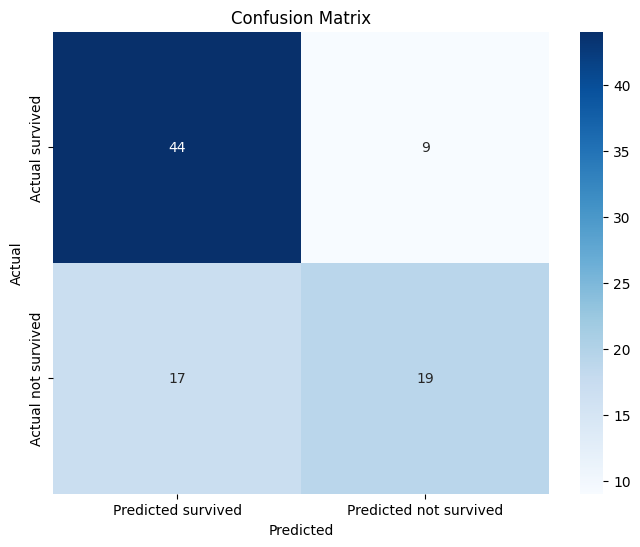

In [15]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted survived', 'Predicted not survived'],
            yticklabels=['Actual survived', 'Actual not survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [17]:

# Precision, Recall, F1-Score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# ROC AUC Score (if your model provides probabilities)
try:
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC AUC Score: {roc_auc:.2f}")
except AttributeError:
    print("ROC AUC Score not available. The model doesn't provide probability estimates.")

Precision: 0.68
Recall: 0.53
F1-Score: 0.59
ROC AUC Score: 0.77
